In [1]:
import pandas, numpy, qnorm, scipy

In [2]:
import sklearn, sklearn.preprocessing, sklearn.decomposition

In [3]:
import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 
                            'xtick.labelsize':20, 
                            'ytick.labelsize':20, 
                            'axes.labelsize':20, 
                            'figure.figsize':(12 * 0.6, 9 * 0.6)})

In [4]:
input_dir = '/Users/adrian/research/vigur/data/metabolomics/targeted/'

basic_input_file = 'EC008_ROSA_PMVEC_INTRA_BASIC.xlsx'
positive_input_file = 'EC008_ROSA_PMVEC_INTRA_POS.xlsx'
negative_input_file = 'EC008_ROSA_PMVEC_INTRA_NEG.xlsx'

### read metadata

In [5]:
metadata = pandas.read_excel(input_dir+positive_input_file, sheet_name=0, index_col=1)

new_labels = [element.split('_')[0] for element in metadata.index.values]
rosetta = dict(zip(metadata.index.values, new_labels))
metadata.rename(index=rosetta, inplace=True)
metadata.head()

,Sample,Sample ID,BioReplicate,Timepoint,µM catech,TecRep,TNFalpha,LPS,cell number,LCMS Method,LCMS Analytical Order,LCMS BATCH
Label,,,,,,,,,,,,
Pool1,PMUEC_INTRA_EC008_103,Pool1_pos,-,-,-,-,-,-,-,HILIC_POS_10min,1,1
Pool1,PMUEC_INTRA_EC008_104,Pool1_pos,-,-,-,-,-,-,-,HILIC_POS_10min,2,1
Pool1,PMUEC_INTRA_EC008_105,Pool1_pos,-,-,-,-,-,-,-,HILIC_POS_10min,3,1
Pool2,PMUEC_INTRA_EC008_107,Pool2_pos,-,-,-,-,-,-,-,HILIC_POS_10min,4,1
008-02,PMUEC_INTRA_EC008_109,008-2,1,0,0,2,0,0,80000,HILIC_POS_10min,5,1


### read data

In [6]:
input_file = basic_input_file
    
path = input_dir + input_file
df = pandas.read_excel(path, sheet_name=1, index_col=0)

only_008 = [element for element in df.index if '008' in element]
subset = df.loc[only_008, :]

log2intensity = numpy.log2(subset+1)

In [7]:
new_labels = [element.split('_')[0] for element in log2intensity.index.values]
print(new_labels)
rosetta = dict(zip(log2intensity.index.values, new_labels))
log2intensity.rename(index=rosetta, inplace=True)
log2intensity.head()

['008-01', '008-02', '008-03', '008-04', '008-05', '008-06', '008-07', '008-08', '008-09', '008-10', '008-11', '008-12', '008-13', '008-14', '008-15', '008-16', '008-17', '008-18', '008-19', '008-20', '008-21', '008-22', '008-23', '008-24', '008-25', '008-26', '008-27', '008-28', '008-29', '008-30', '008-31', '008-32', '008-33', '008-34', '008-35', '008-36', '008-37', '008-38', '008-39', '008-40', '008-41', '008-42', '008-43', '008-44', '008-45']


,Alanine IS,AMP IS,Citrate IS,Glucose IS,Glutamic Acid IS,Lysine IS,Phenylalanine IS,Succinate IS,Glutamic acid,Glucose 6-phosphate,...,FA_16_1,FA_18_0,FA_18_1,FA_18_2,FA_18_3,FA 20_0,FA_20_4,FA_22_4,Glucose,"hexose-1,6-bisphosphate"
Sample,,,,,,,,,,,,,,,,,,,,,
008-01,8.238195,13.047163,0.000000,4.272173,10.001754,9.779383,10.532994,9.241673,9.856506,2.648005,...,5.260063,13.424345,7.902936,6.597561,2.420348,5.619794,5.705812,2.620821,4.020947,5.636857
008-02,7.966177,12.802923,0.785760,4.260628,9.941567,9.673685,10.096386,9.208459,9.812728,3.334997,...,6.565262,11.933709,7.674849,5.616799,0.814755,5.438492,4.695270,2.631104,2.937533,5.666501
008-03,8.714592,13.051116,0.697774,3.813422,9.306331,10.227141,10.688506,8.642655,9.334633,4.324523,...,3.466497,12.745275,6.383220,3.850699,0.000000,6.664653,3.194087,1.653977,1.864731,7.146329
008-04,8.612577,13.209750,0.678072,6.347719,10.366839,10.145969,11.529211,9.773787,10.602683,3.718088,...,4.085510,14.532492,7.227183,6.429834,0.935837,7.051035,2.612117,1.215989,1.874600,7.049794
008-05,8.027187,11.293465,0.439357,5.394960,8.988378,9.843995,10.919298,8.409374,9.107863,2.371559,...,3.833599,13.707880,6.516724,4.829596,0.000000,6.208420,2.833092,2.525067,2.703765,5.423847


In [8]:
internal_standards = [element for element in log2intensity.columns if 'IS' in element]
print(internal_standards)

['Alanine IS', 'AMP IS', 'Citrate IS', 'Glucose IS', 'Glutamic Acid IS', 'Lysine IS', 'Phenylalanine IS', 'Succinate IS']


In [9]:
matplotlib.colors.TABLEAU_COLORS.keys()

dict_keys(['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan'])

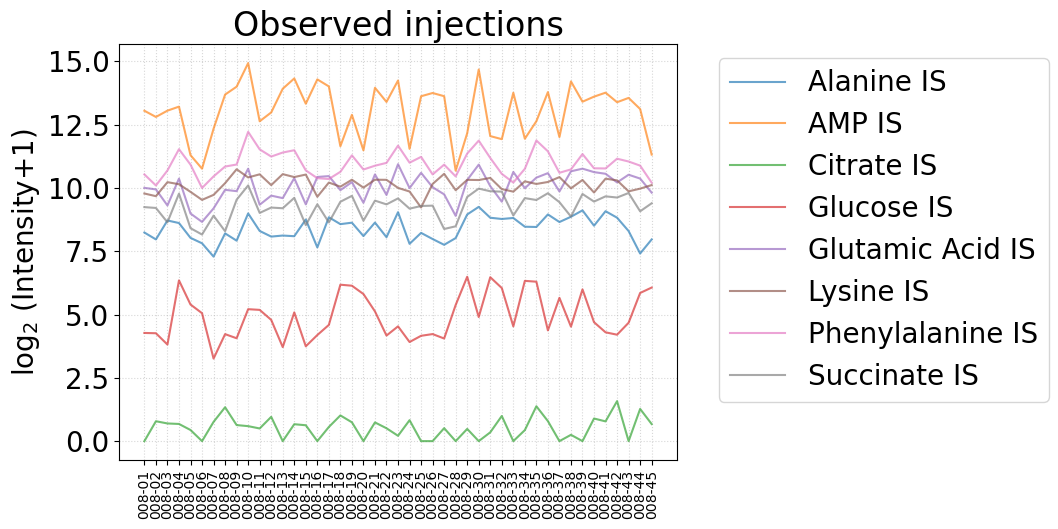

In [10]:
trend = log2intensity[internal_standards].mean(axis=1)
average = numpy.mean(trend)

tabcolors = list(matplotlib.colors.TABLEAU_COLORS.keys())

for i in range(len(internal_standards)):
    internal_standard = internal_standards[i]
    plotting_color = tabcolors[i]
    matplotlib.pyplot.plot(log2intensity[internal_standard], '-', color=plotting_color, ms=12, alpha=2/3, label=internal_standard)

matplotlib.pyplot.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
matplotlib.pyplot.title('Observed injections')
matplotlib.pyplot.ylabel('log$_2$ (Intensity+1)')
matplotlib.pyplot.xticks(rotation=90, fontsize=10)
matplotlib.pyplot.grid(alpha=0.5, ls=':')
matplotlib.pyplot.show()

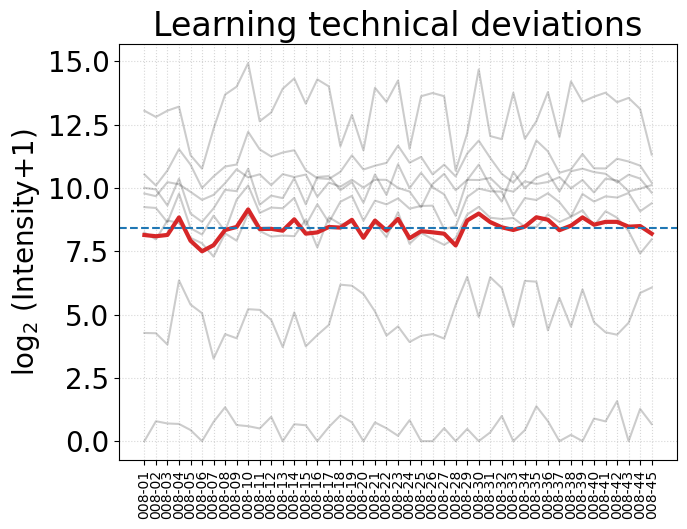

In [11]:
trend = log2intensity[internal_standards].mean(axis=1)
average = numpy.mean(trend)
for internal_standard in internal_standards:

    matplotlib.pyplot.plot(log2intensity[internal_standard], '-', color='black', ms=12, alpha=1/5)

matplotlib.pyplot.plot(log2intensity[internal_standards].mean(axis=1), '-', color='tab:red', lw=3)
matplotlib.pyplot.axhline(average, ls='--', color='tab:blue')

matplotlib.pyplot.title('Learning technical deviations')
matplotlib.pyplot.ylabel('log$_2$ (Intensity+1)')
matplotlib.pyplot.xticks(rotation=90, fontsize=10)
matplotlib.pyplot.grid(alpha=0.5, ls=':')
matplotlib.pyplot.show

correction = -(trend - average)

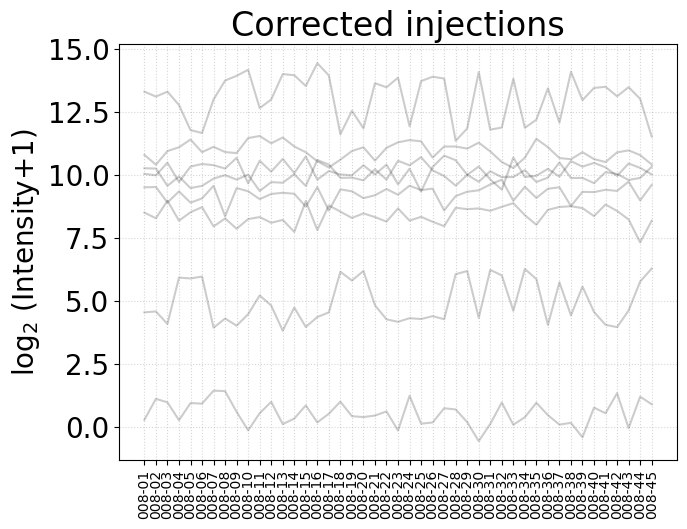

In [12]:
for internal_standard in internal_standards:
    injection = log2intensity[internal_standard]
    corrected = injection + correction
    matplotlib.pyplot.plot(corrected, '-', color='black', ms=12, alpha=1/5)

matplotlib.pyplot.title('Corrected injections')
matplotlib.pyplot.ylabel('log$_2$ (Intensity+1)')
matplotlib.pyplot.xticks(rotation=90, fontsize=10)
matplotlib.pyplot.grid(alpha=0.5, ls=':')
matplotlib.pyplot.show()

### correction

In [13]:
log2intensity.head()

,Alanine IS,AMP IS,Citrate IS,Glucose IS,Glutamic Acid IS,Lysine IS,Phenylalanine IS,Succinate IS,Glutamic acid,Glucose 6-phosphate,...,FA_16_1,FA_18_0,FA_18_1,FA_18_2,FA_18_3,FA 20_0,FA_20_4,FA_22_4,Glucose,"hexose-1,6-bisphosphate"
Sample,,,,,,,,,,,,,,,,,,,,,
008-01,8.238195,13.047163,0.000000,4.272173,10.001754,9.779383,10.532994,9.241673,9.856506,2.648005,...,5.260063,13.424345,7.902936,6.597561,2.420348,5.619794,5.705812,2.620821,4.020947,5.636857
008-02,7.966177,12.802923,0.785760,4.260628,9.941567,9.673685,10.096386,9.208459,9.812728,3.334997,...,6.565262,11.933709,7.674849,5.616799,0.814755,5.438492,4.695270,2.631104,2.937533,5.666501
008-03,8.714592,13.051116,0.697774,3.813422,9.306331,10.227141,10.688506,8.642655,9.334633,4.324523,...,3.466497,12.745275,6.383220,3.850699,0.000000,6.664653,3.194087,1.653977,1.864731,7.146329
008-04,8.612577,13.209750,0.678072,6.347719,10.366839,10.145969,11.529211,9.773787,10.602683,3.718088,...,4.085510,14.532492,7.227183,6.429834,0.935837,7.051035,2.612117,1.215989,1.874600,7.049794
008-05,8.027187,11.293465,0.439357,5.394960,8.988378,9.843995,10.919298,8.409374,9.107863,2.371559,...,3.833599,13.707880,6.516724,4.829596,0.000000,6.208420,2.833092,2.525067,2.703765,5.423847


In [14]:
correction.head()

Sample
008-01    0.269630
008-02    0.316848
008-03    0.266104
008-04   -0.424194
008-05    0.494295
dtype: float64

In [15]:
log2intensity_corrected = log2intensity.add(correction, axis=0)
log2intensity_corrected.head()

,Alanine IS,AMP IS,Citrate IS,Glucose IS,Glutamic Acid IS,Lysine IS,Phenylalanine IS,Succinate IS,Glutamic acid,Glucose 6-phosphate,...,FA_16_1,FA_18_0,FA_18_1,FA_18_2,FA_18_3,FA 20_0,FA_20_4,FA_22_4,Glucose,"hexose-1,6-bisphosphate"
Sample,,,,,,,,,,,,,,,,,,,,,
008-01,8.507824,13.316792,0.269630,4.541802,10.271384,10.049012,10.802623,9.511303,10.126136,2.917635,...,5.529693,13.693975,8.172565,6.867191,2.689977,5.889424,5.975442,2.890451,4.290576,5.906486
008-02,8.283025,13.119772,1.102608,4.577476,10.258415,9.990534,10.413234,9.525307,10.129576,3.651846,...,6.882110,12.250558,7.991697,5.933647,1.131604,5.755341,5.012118,2.947953,3.254381,5.983349
008-03,8.980697,13.317220,0.963878,4.079526,9.572435,10.493245,10.954610,8.908759,9.600737,4.590627,...,3.732601,13.011379,6.649325,4.116804,0.266104,6.930758,3.460191,1.920082,2.130835,7.412434
008-04,8.188383,12.785556,0.253878,5.923525,9.942645,9.721775,11.105017,9.349593,10.178489,3.293893,...,3.661315,14.108297,6.802989,6.005639,0.511643,6.626841,2.187922,0.791795,1.450406,6.625600
008-05,8.521482,11.787760,0.933652,5.889254,9.482672,10.338289,11.413593,8.903668,9.602158,2.865853,...,4.327893,14.202174,7.011019,5.323890,0.494295,6.702714,3.327387,3.019361,3.198060,5.918142


### PCA

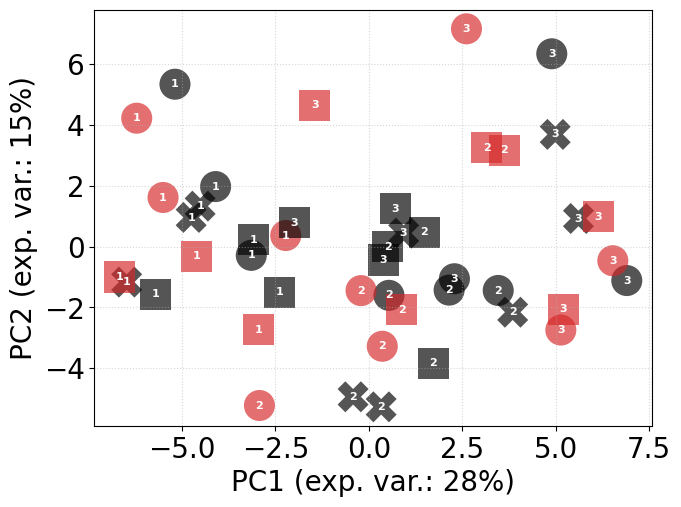

In [16]:
scaled_data = sklearn.preprocessing.StandardScaler().fit_transform(log2intensity_corrected)
model = sklearn.decomposition.PCA(n_components=2)
locations = model.fit_transform(scaled_data)
explained = model.explained_variance_ratio_

for j in range(len(locations)):
    label = log2intensity_corrected.index[j]

    # treatment
    treatment = metadata.loc[label, 'µM catech']
    if treatment == 0:
        the_color = 'black'
    elif treatment == 5:
        the_color = 'tab:red'
    else:
        print(treatment)
        raise ValueError('unknown treatment')
    # timepoint
    timepoint = metadata.loc[label, 'Timepoint']
    if timepoint == 0:
        the_marker = 'X'
    elif timepoint == 4:
        the_marker = 'o'
    elif timepoint == 24:
        the_marker = 's'
    else:
        raise ValueError('unknown timepoint')
    # replicate
    replicate = metadata.loc[label, 'BioReplicate']
    # plot
    matplotlib.pyplot.scatter(locations[j, 0], locations[j, 1], 
                              s=500, c=the_color, alpha=2/3, edgecolors='none', marker=the_marker)
    matplotlib.pyplot.text(locations[j, 0], locations[j, 1], replicate, 
                           fontsize=8, color='white', ha='center', va='center', weight='bold')

matplotlib.pyplot.xlabel('PC1 (exp. var.: {}%)'.format(int(explained[0]*100)))
matplotlib.pyplot.ylabel('PC2 (exp. var.: {}%)'.format(int(explained[1]*100)))
matplotlib.pyplot.grid(alpha=0.5, ls=':')

### identify differences

In [17]:
print(log2intensity_corrected.shape)
log2intensity_corrected.head()

(45, 53)


,Alanine IS,AMP IS,Citrate IS,Glucose IS,Glutamic Acid IS,Lysine IS,Phenylalanine IS,Succinate IS,Glutamic acid,Glucose 6-phosphate,...,FA_16_1,FA_18_0,FA_18_1,FA_18_2,FA_18_3,FA 20_0,FA_20_4,FA_22_4,Glucose,"hexose-1,6-bisphosphate"
Sample,,,,,,,,,,,,,,,,,,,,,
008-01,8.507824,13.316792,0.269630,4.541802,10.271384,10.049012,10.802623,9.511303,10.126136,2.917635,...,5.529693,13.693975,8.172565,6.867191,2.689977,5.889424,5.975442,2.890451,4.290576,5.906486
008-02,8.283025,13.119772,1.102608,4.577476,10.258415,9.990534,10.413234,9.525307,10.129576,3.651846,...,6.882110,12.250558,7.991697,5.933647,1.131604,5.755341,5.012118,2.947953,3.254381,5.983349
008-03,8.980697,13.317220,0.963878,4.079526,9.572435,10.493245,10.954610,8.908759,9.600737,4.590627,...,3.732601,13.011379,6.649325,4.116804,0.266104,6.930758,3.460191,1.920082,2.130835,7.412434
008-04,8.188383,12.785556,0.253878,5.923525,9.942645,9.721775,11.105017,9.349593,10.178489,3.293893,...,3.661315,14.108297,6.802989,6.005639,0.511643,6.626841,2.187922,0.791795,1.450406,6.625600
008-05,8.521482,11.787760,0.933652,5.889254,9.482672,10.338289,11.413593,8.903668,9.602158,2.865853,...,4.327893,14.202174,7.011019,5.323890,0.494295,6.702714,3.327387,3.019361,3.198060,5.918142


In [20]:
for metabolite in log2intensity_corrected.columns:
    print(metabolite)
    for bio_rep in [1, 2, 3]:
        for time_point in [4, 24]:
        
            rules = (metadata['BioReplicate'] == bio_rep) & (metadata['Timepoint'] == time_point) & (metadata['µM catech'] == 0) 
            sampleIDs = list(metadata[rules].index.values)
            reference_values = log2intensity_corrected.loc[sampleIDs, metabolite].values
    
            rules = (metadata['BioReplicate'] == bio_rep) & (metadata['Timepoint'] == time_point) & (metadata['µM catech'] == 5) 
            sampleIDs = list(metadata[rules].index.values)
            drug_values = log2intensity_corrected.loc[sampleIDs, metabolite].values

            a = numpy.mean(drug_values)
            b = numpy.mean(reference_values)
            log2FC = a - b
            averageI = numpy.mean([a, b])
            [statistic, pvalue] = scipy.stats.ttest_ind(drug_values, reference_values)
            
            if (pvalue < 0.05) & (numpy.abs(log2FC) > numpy.log2(1.5)):
                message = '\t {} Exp. {} T={} \t\t log2FC={:.2f} P={:.2e} \t\t I={:.2f}'.format(metabolite, bio_rep, time_point, log2FC, pvalue, averageI)
                print(message)
            else:
                pass
                #message = '\t {} Exp. {} T={} \t\t log2FC={:.2f} P={:.2e} \t\t I={:.2f}'.format(metabolite, bio_rep, time_point, log2FC, pvalue, averageI)
            #print(message)

Alanine IS
AMP IS
	 AMP IS Exp. 1 T=4 		 log2FC=1.49 P=3.09e-02 		 I=12.83
Citrate IS
Glucose IS
	 Glucose IS Exp. 1 T=4 		 log2FC=-1.85 P=8.34e-05 		 I=5.00
	 Glucose IS Exp. 2 T=4 		 log2FC=-1.36 P=2.93e-02 		 I=4.93
Glutamic Acid IS
Lysine IS
Phenylalanine IS
Succinate IS
Glutamic acid
Glucose 6-phosphate
Glutamine
Glutathione reduced
	 Glutathione reduced Exp. 1 T=4 		 log2FC=1.72 P=1.65e-02 		 I=10.61
Glutathione oxidized
	 Glutathione oxidized Exp. 2 T=24 		 log2FC=2.43 P=6.78e-03 		 I=5.46
Histidine
	 Histidine Exp. 2 T=4 		 log2FC=1.83 P=7.89e-04 		 I=3.82
Mannitol
	 Mannitol Exp. 3 T=24 		 log2FC=-0.60 P=2.47e-02 		 I=12.31
Methionine
Oxoproline
	 Oxoproline Exp. 3 T=4 		 log2FC=-0.73 P=3.13e-02 		 I=7.26
Palmitate
Phenylalanine
	 Phenylalanine Exp. 2 T=4 		 log2FC=0.69 P=2.38e-02 		 I=4.16
Pantothenic Acid
Succinic acid
ADP
AMP
	 AMP Exp. 2 T=4 		 log2FC=2.35 P=7.47e-03 		 I=4.04
ATP
	 ATP Exp. 1 T=4 		 log2FC=-1.14 P=2.48e-02 		 I=10.05
	 ATP Exp. 2 T=24 		 log2FC=1.25 P=1.3